# Outline

This part of the project aims to clean and explore the dataset so that it can be used for building the data app and train the predictive model. We'll go through:

* Dataset introduction;
* Data cleaning and preparation;
* Exploratory data analysis.

-------------------------

### About the abalone dataset

Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae(Wikipedia).

This dataset is used to predict the age of abalone from physical measurements, which are :

* Sex;
* Length (mm);
* Diameter (mm);
* Height (mm);
* Whole weight (grams);
* Shucked weight (grams);
* Viscera weight (grams);
* Shell weight (grams);
* Rings (+1.5 to get the age in years);

For more information you can read the `abalone.names` file or visit the data repository on [UCI](https://archive.ics.uci.edu/dataset/1/abalone).

---------------

### Data cleaning and preparation

In [2]:
import pandas as pd
import numpy as np

Importing the dataset

In [3]:
names = ["Sex", "Length", "Diam", "Height", "Whole", "Shucked", "Viscera", "Shell", "Rings"]
abalone_df = pd.read_csv("abalone.data", header = None, names = names)
abalone_df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Data Shape

In [4]:
abalone_df.shape

(4177, 9)

Descriptive Statistics

In [5]:
abalone_df.describe()

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Data information

In [6]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sex      4177 non-null   object 
 1   Length   4177 non-null   float64
 2   Diam     4177 non-null   float64
 3   Height   4177 non-null   float64
 4   Whole    4177 non-null   float64
 5   Shucked  4177 non-null   float64
 6   Viscera  4177 non-null   float64
 7   Shell    4177 non-null   float64
 8   Rings    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


We can see from the descriptive stats that the minimum height is 0 which doesn't make sense. That's why we should remove such records.

In [7]:
abalone_df[abalone_df["Height"] == 0]

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [8]:
abalone_df.drop(index = [1257, 3996], axis = 0, inplace = True)

In [9]:
abalone_df[abalone_df["Height"] == 0]

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings


In [10]:
abalone_df.reset_index(drop = True)

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4173,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The final check will be on the sex attribute

In [11]:
abalone_df["Sex"].value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

There is no typos within the categories, we can now save our dataframe to a file.

In [12]:
abalone_df.to_csv("abalone.csv", index = False)

Now the data is ready for some analysis.

---------------------

### Exploratory Data Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
numericalFeatures = abalone_df.describe(include = np.number).columns.tolist()
categoricalFeatures = abalone_df.describe(include = np.object_).columns.tolist()

* Numerical data distributions

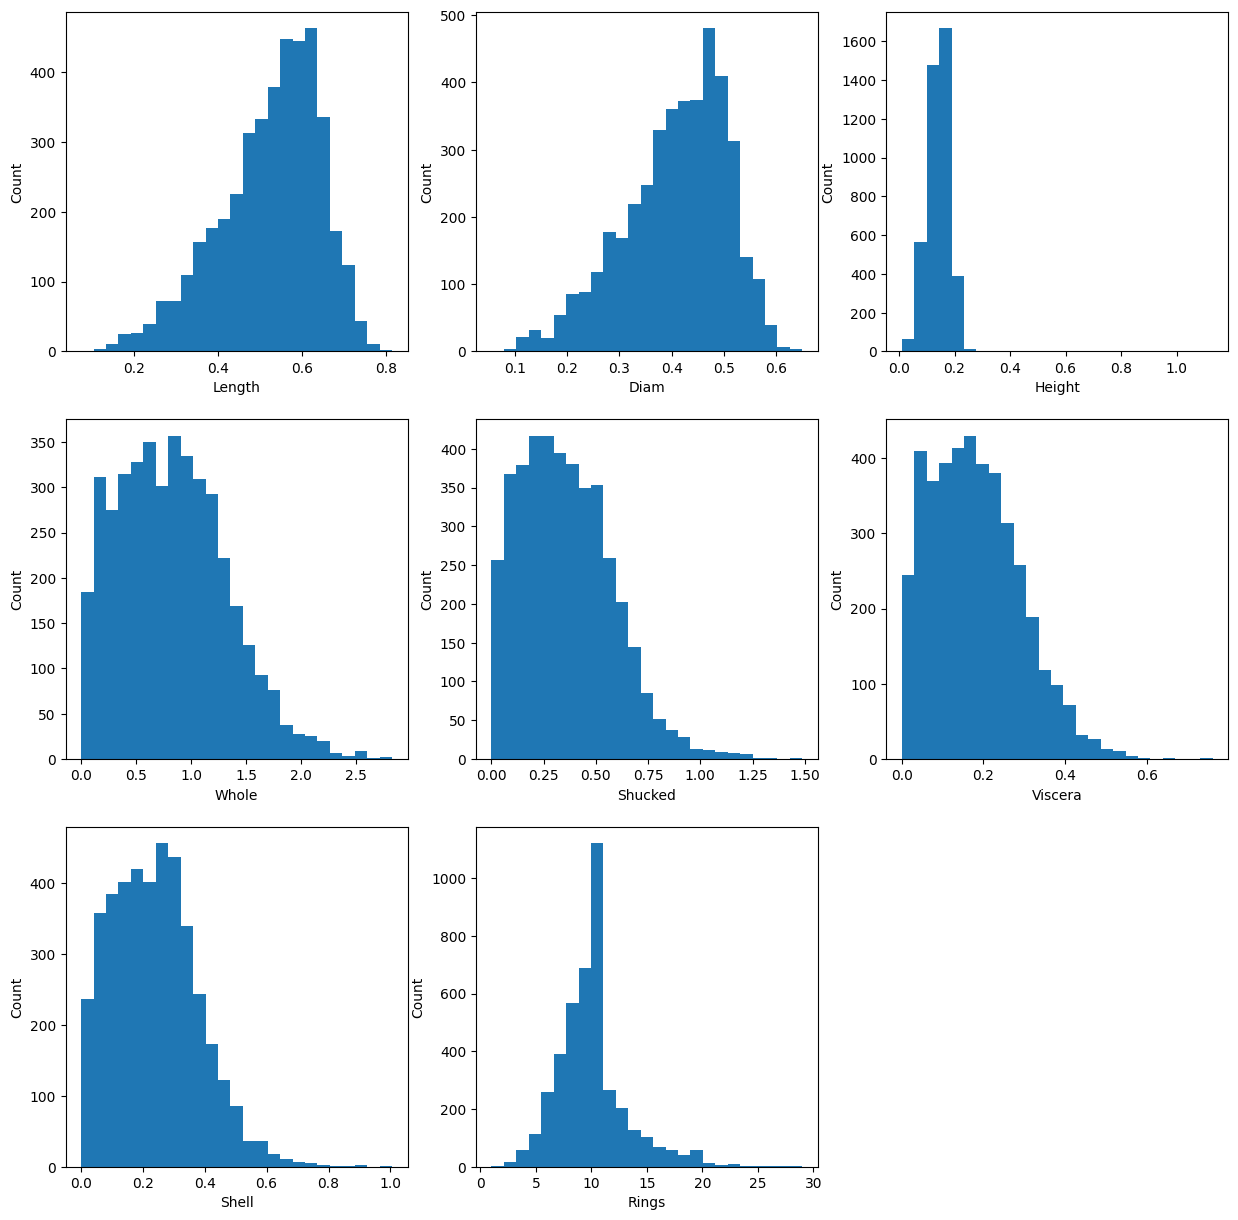

In [28]:
fig = plt.figure(figsize = (15, 15))

for i in range(1, len(numericalFeatures)+1):
    feature = numericalFeatures[i-1]
    ax = fig.add_subplot(3, 3, i)
    ax.hist(abalone_df[feature], bins = 25, histtype = "stepfilled")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

plt.show()

The distributions suggest the presence of outliers that should be dealt with before training the model.

* Categorical data distributions

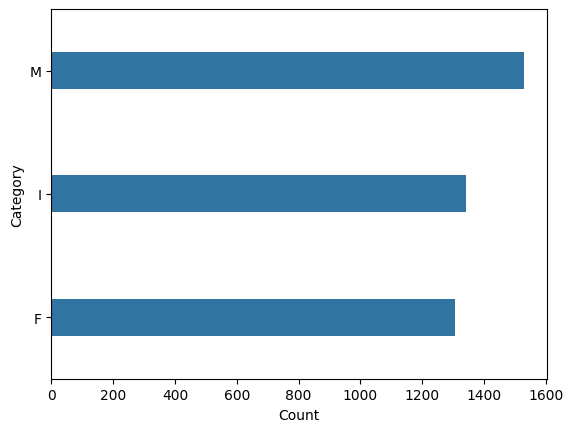

In [48]:
sns.barplot(x = abalone_df["Sex"].value_counts().values, y = abalone_df["Sex"].value_counts().index, width = 0.3)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

The samples from the different sex categories are approximately the same.

* Data relationship

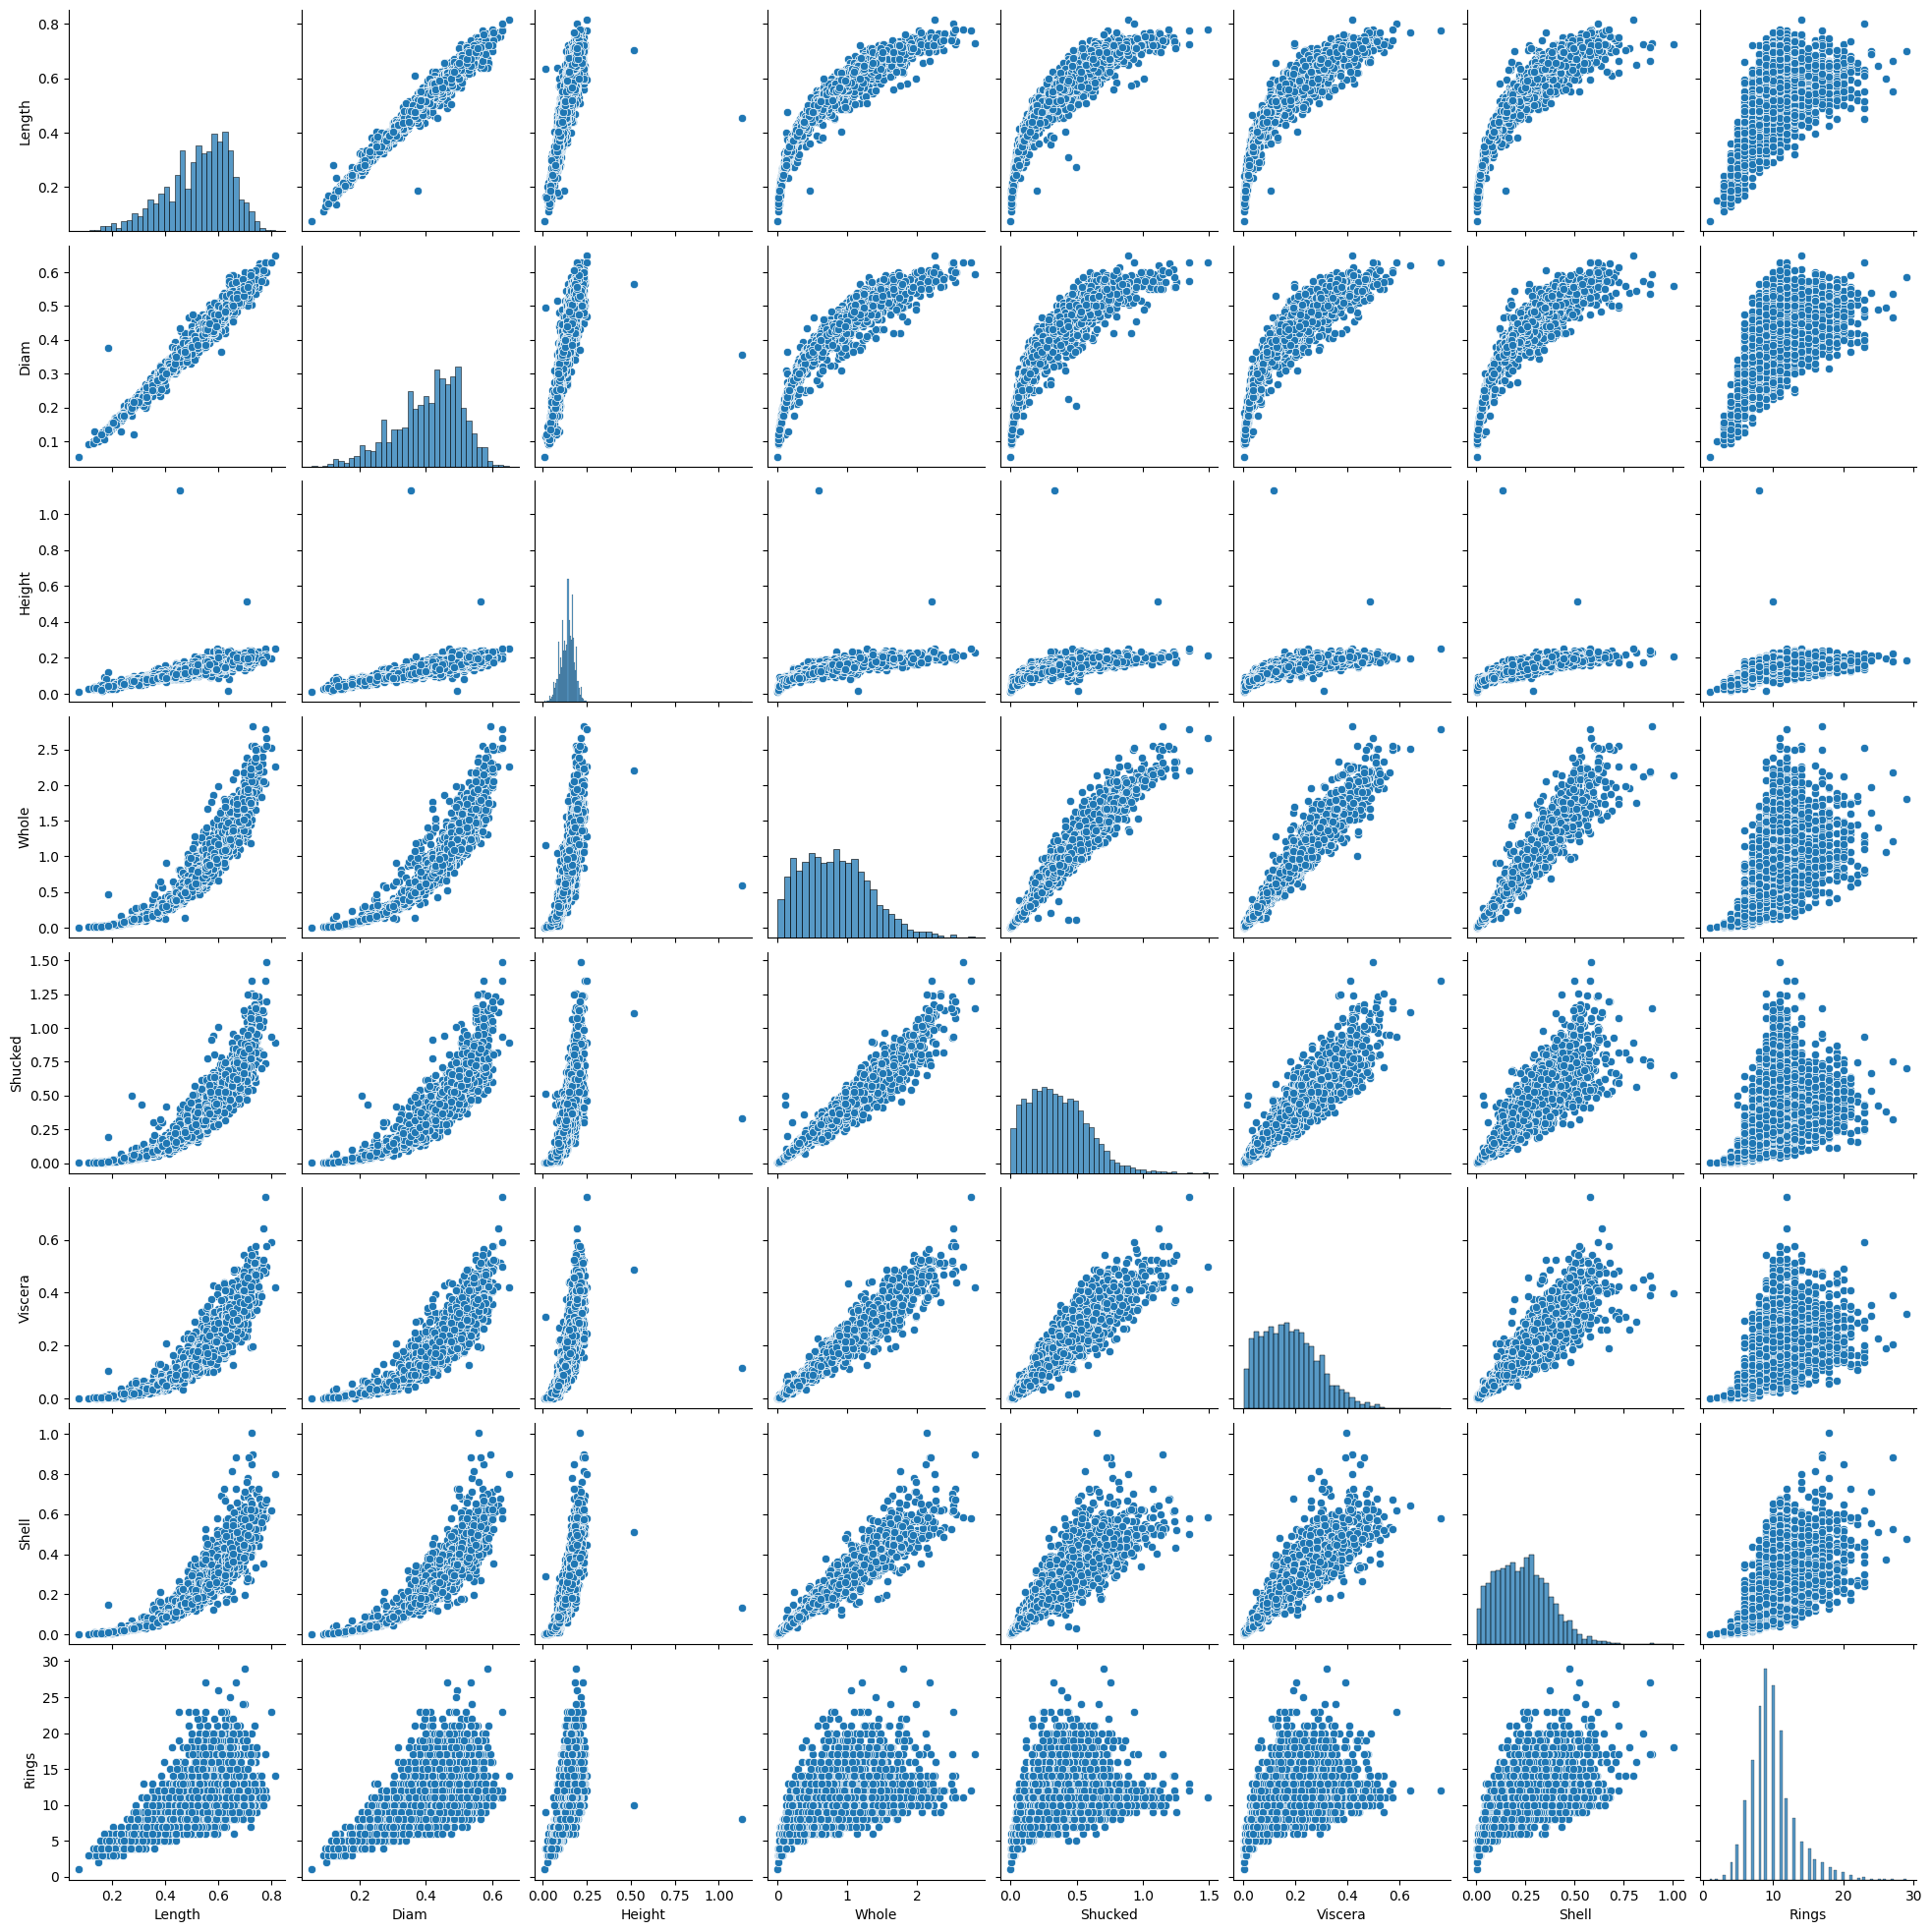

In [54]:
sns.pairplot(data = abalone_df)
plt.show()

We see a strong colinearity among the predictors, we'll use the heatmap to show more details.

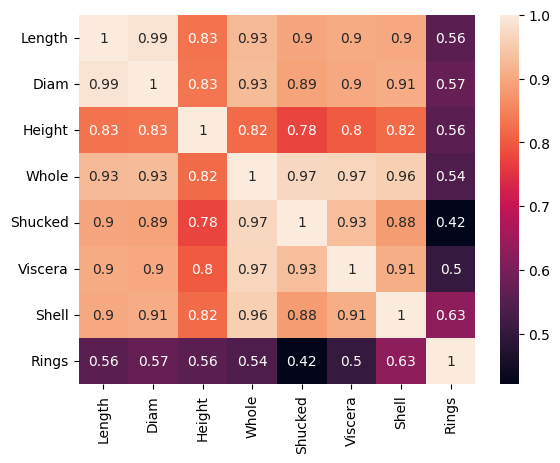

In [53]:
corr_mat = abalone_df.corr(numeric_only = True)
sns.heatmap(corr_mat, annot = True)
plt.show()